In [77]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

from utilities import plot_class_pdf, show_boundary_2D, load_data, split_data, safeshape

# Theoretical part
Please remember to embed the answers of the theoretical part for the bonus within the report from this file.

You may either 
 * answer within this notebook using the markup cells, or
 * create a pdf file for your theoretical answers in another way and then manually merge it with the pdf report from this notebook.
 
 In both cases, you should submit a single pdf file containing both the answer of your theoretical part and the report of the practical part.

# Practical part

## Loading data_1
We first load the first dataset.

In [78]:
data_1 = load_data('bonus_1',2)

## Study the dataset

Try to get the intuition of the provided data, by visualising the density of the classes.

_Hint_: You might find useful the provided function ```plot_class_pdf```.

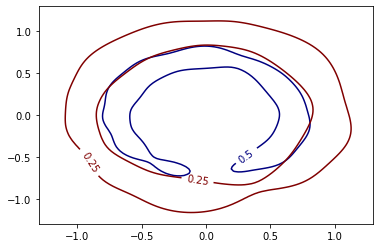

In [79]:
domain = [[-1.3,1.3]]*2
plot_class_pdf(domain,data_1,levels=1,bw_method=.25)

#### Observation
data_1 can not be classified sufficiently well with a linear classifier as data for both classes are plotted in circular shape with some overlapping also.

## Learning with nonlinearities (```data_1```)
Using the knowledge you have acquired so far, but also any additional intuition of your own, perform the appropriate modifications on the data, that will allow a linear classifier to classify this dataset.

For this, you will use a transformation function that will preprocess your data accordingly. Your transformation function will have to be used for both training and classification, appropriately.

Using the provided data splitting, fit a logistic regression model on the training data.

Draw the decision oundary of your classifier. _Hint_: You might find useful the function ```show_boundary_2D```.

Report your accuracy on the testing data.

In [80]:
def acc(X,y, model):
    #Complete this function to compute the model accuracy.
    score = model.score(X, y)
    return score

In [81]:
sdata_1 = split_data(data_1.X,data_1.y)

Accuracy -  0.97


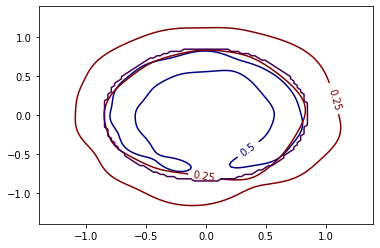

In [82]:
import sklearn as skl
import sklearn.linear_model

# Train your *logistic regression* here
# You may use the models from scikit-learn.

# Fill the next function to accept a design matrix with 2 predicates, and return one with
# at most 2 additional predicates. Feel free to improvise, as long as you end up with
# at most 4 predicates in total.
# Then use this function appropriately to fit and predict.
def trn_1(X):
    # TODO: Modify this function (do not remove the assertion)
    # X_out = ...
    r,c = X.shape
    X_out = X
    X_out = np.append(X_out, np.square(X[:, 0]).reshape(r,1), axis=1) # 3rd column = square(1st column)
    X_out = np.append(X_out, np.square(X[:, 1]).reshape(r,1), axis=1) # 4th column = square(2nd column)
    assert ((X_out.shape[0]==X.shape[0]) and (X_out.shape[1]<=4)),f'You are only allowed to use at MOST 4 predictors, but it seems you are using {safeshape(X_out,1)}'
    return X_out
#mdl = ...

mdl1 = sklearn.linear_model.LogisticRegression()

X_train_1 = trn_1(sdata_1.x_trn)
mdl1.fit(X_train_1, sdata_1.y_trn)

X_test_1 = trn_1(sdata_1.x_tst)
pred = mdl1.predict(X_test_1)


domain = [[-1.4,1.4]]*2
plot_class_pdf(domain,data_1,levels=1,bw_method=.25)
# show_boundary_2D(domain, ...)
# Compute and report the accuracy of your model
show_boundary_2D(domain, mdl1.predict, featmap=trn_1)

#acc( ___ FILL THIS ___)
print("Accuracy - ", acc(X_test_1, sdata_1.y_tst, mdl1))

Accuracy on the test data is 0.97. <br>
We modified the data from 2 to 4 features by adding additional two features generated from current data. 3rd feature is square of 1st feature(X3 = square(X1)) and 4th feature is square of 2nd feature(X4 = square(X2)). <br>
We tried to find linear decision boundary in 4 dimensional space which is non linear in current space. This non linear decision boundary classifies the data pretty good and we have achieved the accuracy of 0.97.
So transforming the features helped in classification with high accuracy.

## Loading data_2

In [83]:
data_2 = load_data('bonus_2',2)

## Study the dataset

Try to get the intuition of the provided data, by visualising the density of the classes.

_Hint_: You might find useful the provided function ```plot_class_pdf```.

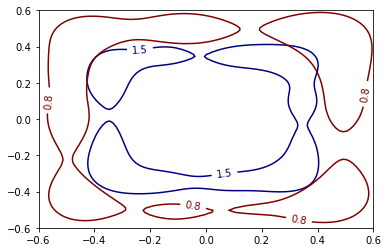

In [84]:
domain_2 = [[-.6,.6]]*2
plot_class_pdf(domain_2,data_2,levels=1,bw_method=.25)

#### Observation
data_2 can not be classified sufficiently well with a linear classifier as data for both classes are plotted in a almost similar to square shape with some overlapping points also.

## Learning with nonlinearities (```data_2```)
Using the knowledge you have acquired so far, but also any additional intuition of your own, perform the appropriate modifications on the new data and its peculiarities, which may have to deviate from the method you used for ```data_1```. Your goal is to find a transform that can replace the given predicates with a single one that allows a linear classifier to classify this dataset.

For this, you will again use a transformation function that will preprocess your data accordingly. Your transformation function will have to be used for both training and classification, appropriately.

Using the provided data splitting, fit a logistic regression model on the training data.

Draw the decision oundary of your classifier. _Hint_: You might find useful the function ```show_boundary_2D```.

Report your accuracy on the testing data.

## Classifying data_2
Again, use any method you prefer to classify the datset using the data_2 dataset.
Using the provided splitting, evaluate your classifier accuracy.
After training, plot the test dataset distribution and the decision boundary of your method.
You might find useful the function _show_boundary_2D_.

In [85]:
sdata_2 = split_data(data_2.X,data_2.y)

Accuracy -  0.87


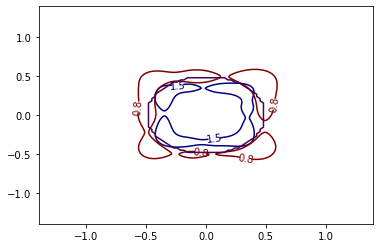

In [86]:
# Here, train your model
import sklearn as skl
import sklearn.linear_model

## Train your logistic regression here
# You may use the models from scikit-learn.

# Fill the next function to accept a design matrix with 2 predicates, and return one with
# exactly one predicate.
# Then use it appropriately to fit and predict.
def trn_2(X):
    # TODO: Modify this function (do not remove the assertion)
    # X_out = ...
    r,c = X.shape
    X_out = (np.square(X[:, 0]) + np.square(X[:, 1])).reshape(r,1) # x1**2 + X2**2
    assert (X_out.shape[0]==X.shape[0]) and (X_out.shape[1]==1),f'This function should return a design matrix with only a single feature, but it seems it returns {safeshape(X_out,1)}'
    return X_out
#mdl = ...

mdl2 = sklearn.linear_model.LogisticRegression()

X_train_2 = trn_2(sdata_2.x_trn)
mdl2.fit(X_train_2, sdata_2.y_trn)

X_test_2 = trn_2(sdata_2.x_tst)
pred = mdl2.predict(X_test_2)


plot_class_pdf(domain_2,data_2,levels=1,bw_method=.25)
#show_boundary_2D(domain_2, mdl, ...
#acc( ___ FILL THIS ___)

show_boundary_2D(domain, mdl2.predict, featmap=trn_2)

print("Accuracy - ", acc(X_test_2, sdata_2.y_tst, mdl2))

Accuracy on the test data is 0.87. <br>
We modified the data from 2 to 1 feature. We experimented different ways to transform the features (from 2 to 1) and found best result with this tranformation : X = square(X1) + square(X2). <br>
We tried to find linear decision boundary on transformed features data which is non linear on current data. This non linear decision boundary classifies the data pretty good and we have achieved the accuracy of 0.87. 
So transforming the features helped in classification with high accuracy.